In [2]:
from google.colab import files
uploaded = files.upload()

Saving cleaner_transformed_data_Rachael.csv to cleaner_transformed_data_Rachael.csv


In [15]:
import pandas as pd


df = pd.read_csv('cleaner_transformed_data_Rachael.csv')

print(df.head())

print("\nDataframe Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

   Unnamed: 0                                 channelDescription  \
0           0  Business inquiries only: info@nikkietutorials....   
1           1  Business inquiries only: info@nikkietutorials....   
2           2  Business inquiries only: info@nikkietutorials....   
3           3  Business inquiries only: info@nikkietutorials....   
4           4  Business inquiries only: info@nikkietutorials....   

  channelJoinedDate  channelTotalVideos  channelTotalViews  channelUsername  \
0      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
1      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
2      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
3      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   
4      Jun 23, 2008               909.0       2.092121e+09  nikkietutorials   

   commentsCount                      date  duration           id  ...  order  \
0         1844.0  2025-01-01T17:03:

In [16]:
df.head(2)

,Unnamed: 0,channelDescription,channelJoinedDate,channelTotalVideos,channelTotalViews,channelUsername,commentsCount,date,duration,id,...,order,text,title,url,viewCount,likes per subscriber,comments per subscriber,views per subscriber,duration in seconds,datetime date
0,0,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1844.0,2025-01-01T17:03:25.000Z,00:01:20,IF6k0pRUGVM,...,1.0,NaN,ICE CREAM lipstick?! 🍦👄,https://www.youtube.com/shorts/IF6k0pRUGVM,10628400.0,0.056438,0.000126,0.727973,80.0,2025-01-01 17:03:25+00:00
1,1,Business inquiries only: info@nikkietutorials....,"Jun 23, 2008",909.0,2.092121e+09,nikkietutorials,1845.0,2024-09-26T17:09:34.000Z,00:00:59,qmrnz6Ee3Vs,...,4.0,NaN,trying TAPE makeup?! 🤔,https://www.youtube.com/shorts/qmrnz6Ee3Vs,7355705.0,0.032055,0.000126,0.503815,59.0,2024-09-26 17:09:34+00:00


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]


print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
print("\nColumn names:", df.columns.tolist())



Dataset contains 17606 rows and 23 columns

Column names: ['Unnamed: 0', 'channelDescription', 'channelJoinedDate', 'channelTotalVideos', 'channelTotalViews', 'channelUsername', 'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes', 'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount', 'likes per subscriber', 'comments per subscriber', 'views per subscriber', 'duration in seconds', 'datetime date']



Correlation Matrix:
               viewCount     likes  commentsCount      hour  day_of_week  \
viewCount       1.000000  0.929195       0.455304 -0.030502     0.020396   
likes           0.929195  1.000000       0.479095 -0.026351     0.018543   
commentsCount   0.455304  0.479095       1.000000 -0.011614     0.023913   
hour           -0.030502 -0.026351      -0.011614  1.000000    -0.029246   
day_of_week     0.020396  0.018543       0.023913 -0.029246     1.000000   
month          -0.001598  0.002906      -0.003134 -0.011341     0.000303   
year           -0.041558 -0.038004      -0.010135 -0.030665     0.013090   

                  month      year  
viewCount     -0.001598 -0.041558  
likes          0.002906 -0.038004  
commentsCount -0.003134 -0.010135  
hour          -0.011341 -0.030665  
day_of_week    0.000303  0.013090  
month          1.000000 -0.491448  
year          -0.491448  1.000000  


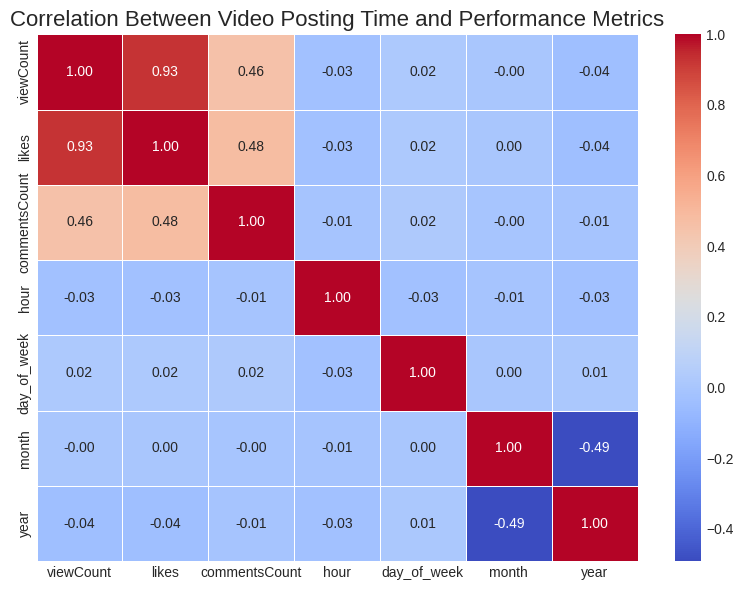

In [18]:

df1 = df.copy()

df1['datetime'] = pd.to_datetime(df['date'])

df1['hour'] = df1['datetime'].dt.hour
df1['day_of_week'] = df1['datetime'].dt.dayofweek  # 0 is Monday, 6 is Sunday
df1['month'] = df1['datetime'].dt.month
df1['year'] = df1['datetime'].dt.year

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df1['day_name'] = df1['day_of_week'].apply(lambda x: day_names[int(x)] if pd.notnull(x) else None)

numeric_columns = ['viewCount', 'likes', 'commentsCount', 'hour', 'day_of_week', 'month', 'year']
numeric_df = df1[numeric_columns].copy()

correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Video Posting Time and Performance Metrics', fontsize=16)
plt.tight_layout()
plt.savefig('time_correlation_heatmap.png')
plt.show()










In [19]:
df1.columns

Index(['Unnamed: 0', 'channelDescription', 'channelJoinedDate',
       'channelTotalVideos', 'channelTotalViews', 'channelUsername',
       'commentsCount', 'date', 'duration', 'id', 'isChannelVerified', 'likes',
       'numberOfSubscribers', 'order', 'text', 'title', 'url', 'viewCount',
       'likes per subscriber', 'comments per subscriber',
       'views per subscriber', 'duration in seconds', 'datetime date',
       'datetime', 'hour', 'day_of_week', 'month', 'year', 'day_name'],
      dtype='object')

<ipython-input-20-4f1923c5c36f>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-20-4f1923c5c36f>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
<ipython-input-20-4f1923c5c36f>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


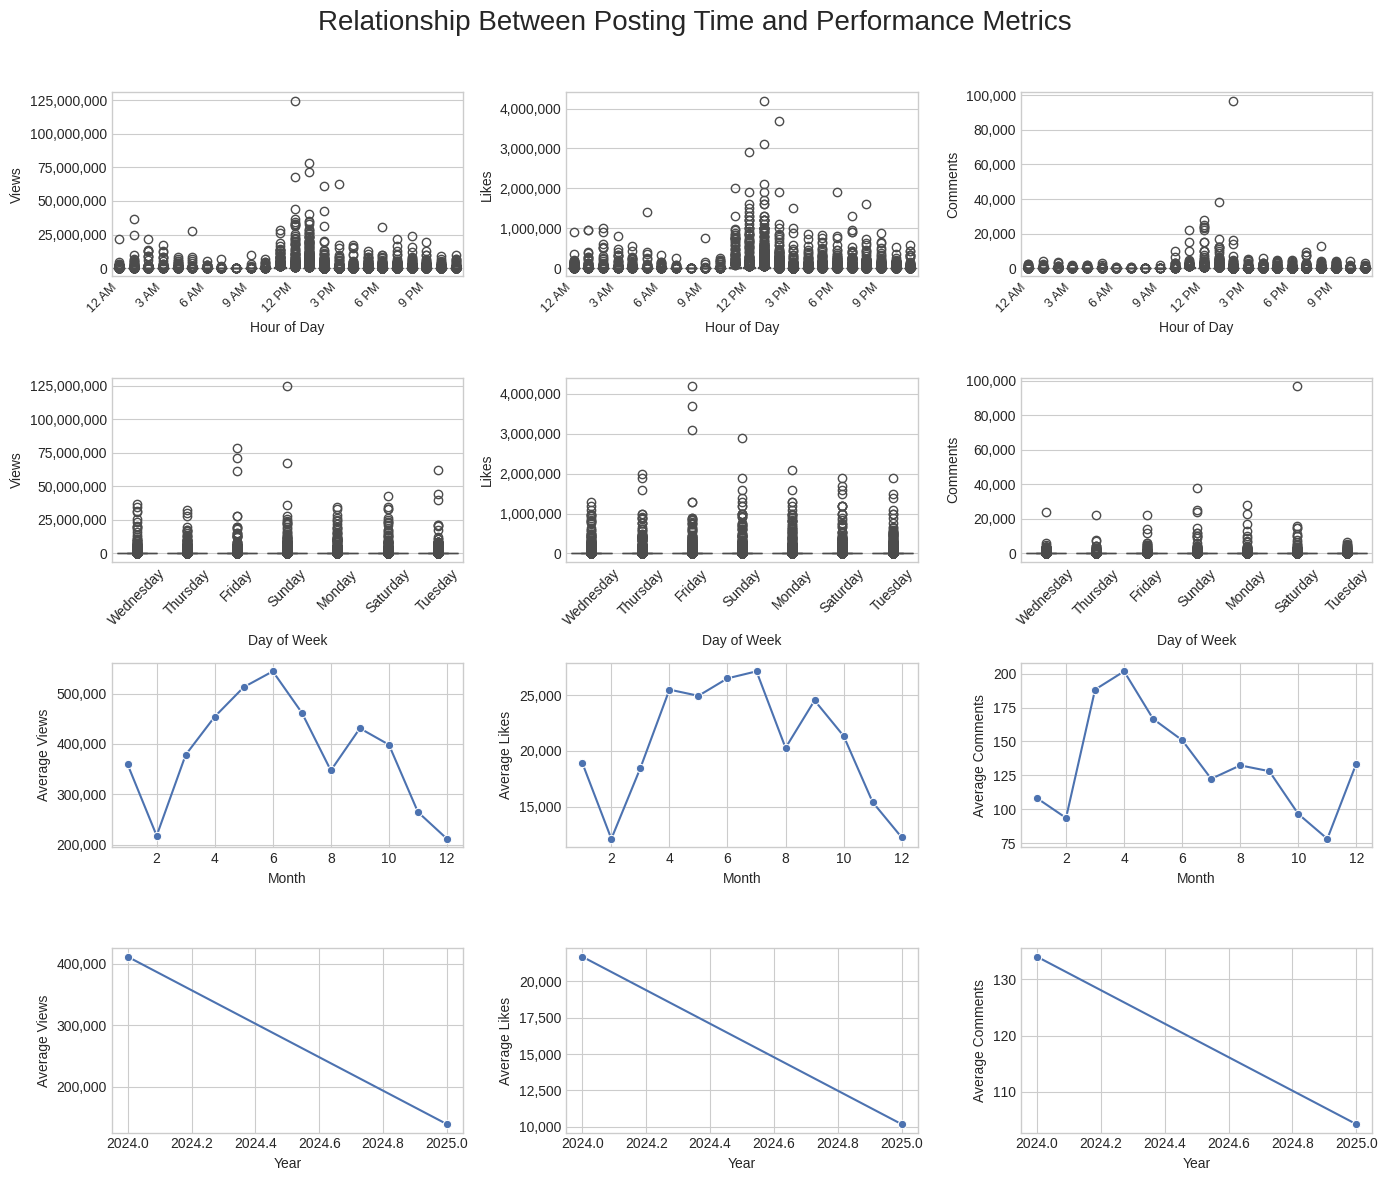

In [20]:
time_elements = ['hour', 'day_of_week', 'month', 'year']
performance_metrics = ['viewCount', 'likes', 'commentsCount']

fig, axes = plt.subplots(len(time_elements), len(performance_metrics), figsize=(14, 12))
fig.suptitle('Relationship Between Posting Time and Performance Metrics', fontsize=20)

for i, time_element in enumerate(time_elements):
    for j, metric in enumerate(performance_metrics):
        ax = axes[i, j]

        if time_element in ['hour', 'day_of_week']:
            if time_element == 'day_of_week':
                temp_df = df1.copy()
                temp_df['day_category'] = temp_df['day_name']
                sns.boxplot(x='day_category', y=metric, data=temp_df, ax=ax)
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

            else:
                sns.boxplot(x=time_element, y=metric, data=df1, ax=ax)

                hour_ticks = range(0, 24, 3)  # Show every 3 hours
                hour_labels = []
                for h in hour_ticks:
                    if h == 0:
                        hour_labels.append("12 AM")
                    elif h < 12:
                        hour_labels.append(f"{h} AM")
                    elif h == 12:
                        hour_labels.append("12 PM")
                    else:
                        hour_labels.append(f"{h-12} PM")

                ax.set_xticks(hour_ticks)
                ax.set_xticklabels(hour_labels, rotation=45, ha='right', fontsize=9)

            if metric == 'viewCount':
                ax.set_ylabel('Views')
            elif metric == 'commentsCount':
                ax.set_ylabel('Comments')
            else:
                ax.set_ylabel(metric.capitalize())

            if time_element == 'hour':
                ax.set_xlabel('Hour of Day')
            elif time_element == 'day_of_week':
                ax.set_xlabel('Day of Week')
            else:
                ax.set_xlabel(time_element.capitalize())

            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}' if x >= 1000 else f'{int(x)}'))

        else:
            grouped = df1.groupby(time_element)[metric].mean().reset_index()
            sns.lineplot(x=time_element, y=metric, data=grouped, marker='o', ax=ax)

            if metric == 'viewCount':
                ax.set_ylabel('Average Views')
            elif metric == 'commentsCount':
                ax.set_ylabel('Average Comments')
            else:
                ax.set_ylabel(f'Average {metric.capitalize()}')

            ax.set_xlabel(time_element.capitalize())

            ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}' if x >= 1000 else f'{int(x)}'))

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('time_performance_relationships.png')
plt.show()

# **Best Hours for YouTube Performance**
**Views Optimization:**


---


**Prime Time:** 12-3 PM shows highest concentration of successful videos

**Strong Period:** 12 AM - 3 PM consistently outperforms other hours

**Avoid**: Early morning (6-8 AM) shows poorest performance



---



**Engagement Patterns:**

Likes and comments peak around 12-3 PM

Midday posting (12-3 PM) specifically encourages viewer discussion

Morning and evening hours show notably lower engagement


---


**Key Insight:** Videos posted at 12-3 PM have the highest potential for exceptional performance, with the platform's most-viewed content (125M+ views) and highest engagement occurring during this hour.






#  Engagement by Day of the Week (Top Row)

There are significant outliers in all three metrics, indicating that certain posts receive exceptionally high engagement.
The overall distribution appears fairly consistent across days, suggesting that engagement levels do not drastically change based on the day of the week.
# Engagement Trends by Month (Bottom Row)

Seasonal Trends: People may watch and like more content in the summer months (May–July), but they engage in discussions (comments) earlier in the year.

Content Type: Certain content types may encourage more commenting in early months, while others drive views and likes in the summer.

 Viewers might be more passive (watching and liking) during summer but more engaged in discussions earlier.
# Key Takeaways
Engagement is relatively steady across weekdays, but certain posts receive exceptional engagement (outliers).
Mid-year (May to July) sees higher average engagement, possibly due to seasonal trends or increased social media activity.

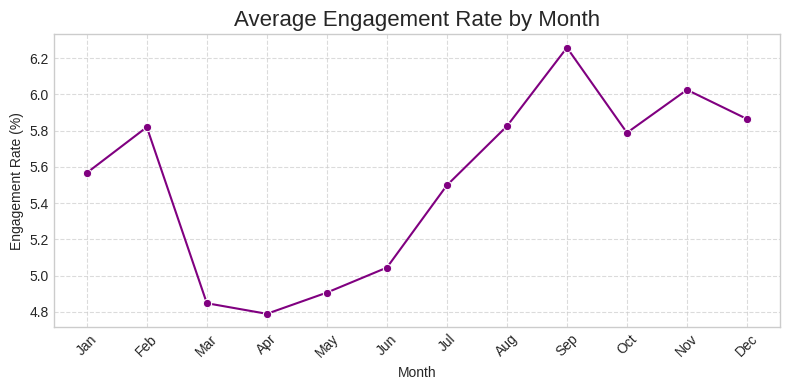

Best month for engagement: Sep (6.26% engagement rate)


In [22]:

df1['engagement_rate'] = (df1['likes'] + df1['commentsCount']) / df1['viewCount'] * 100

monthly_metrics = df1.groupby('month').agg({
    'engagement_rate': 'mean'
}).reset_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_metrics['month_name'] = monthly_metrics['month'].apply(lambda x: month_names[int(x)-1] if pd.notnull(x) else None)

plt.figure(figsize=(8, 4))
sns.lineplot(x='month_name', y='engagement_rate', data=monthly_metrics, marker='o', color='purple')
plt.title('Average Engagement Rate by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('engagement_by_month.png')
plt.show()

best_month_engagement = monthly_metrics.loc[monthly_metrics['engagement_rate'].idxmax()]
print(f"Best month for engagement: {best_month_engagement['month_name']} ({best_month_engagement['engagement_rate']:.2f}% engagement rate)")

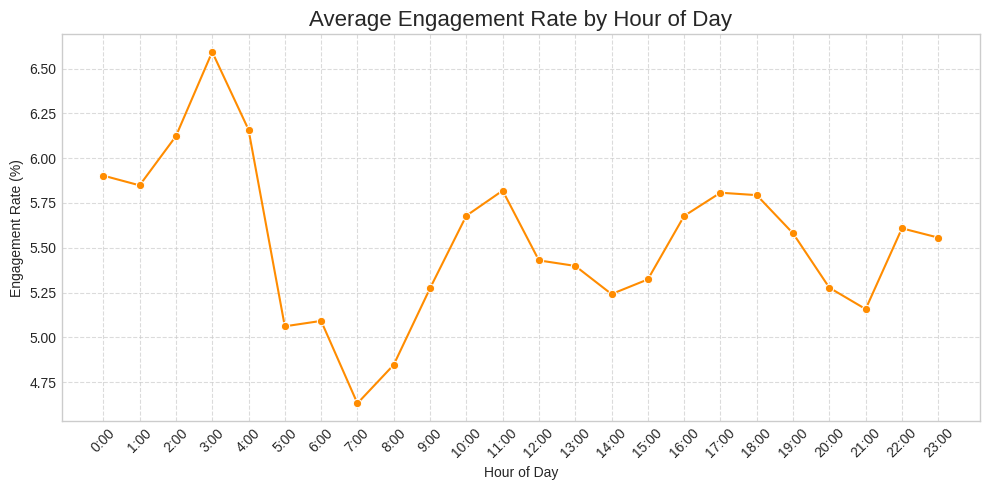

Best hour for engagement: 3:00 (6.59% engagement rate)


In [23]:
hourly_metrics = df1.groupby('hour').agg({
    'engagement_rate': 'mean'
}).reset_index()

hourly_metrics['hour_label'] = hourly_metrics['hour'].apply(lambda x: f"{int(x)}:00")

plt.figure(figsize=(10, 5))
sns.lineplot(x='hour_label', y='engagement_rate', data=hourly_metrics, marker='o', color='darkorange')
plt.title('Average Engagement Rate by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('engagement_by_hour.png')
plt.show()

best_hour_engagement = hourly_metrics.loc[hourly_metrics['engagement_rate'].idxmax()]
print(f"Best hour for engagement: {int(best_hour_engagement['hour'])}:00 ({best_hour_engagement['engagement_rate']:.2f}% engagement rate)")

In [37]:
hourly_stats = df1.groupby('hour').agg({
    'id': 'count',
    'viewCount': 'sum',
    'likes': 'sum',
    'commentsCount': 'sum'
}).reset_index()

hourly_stats.rename(columns={'id': 'videos'}, inplace=True)

hourly_stats['avg_views'] = hourly_stats['viewCount'] / hourly_stats['videos']
hourly_stats['avg_likes'] = hourly_stats['likes'] / hourly_stats['videos']
hourly_stats['avg_comments'] = hourly_stats['commentsCount'] / hourly_stats['videos']

hourly_stats['engagement'] = (hourly_stats['likes'] + hourly_stats['commentsCount']) / hourly_stats['viewCount'] * 100

pd.set_option('display.float_format', '{:.2f}'.format)

table_data = hourly_stats[['hour', 'videos', 'viewCount', 'likes', 'commentsCount',
                           'avg_views', 'avg_likes', 'avg_comments', 'engagement']]

table_data.columns = ['Hour', 'Videos', 'Total Views', 'Total Likes', 'Total Comments',
                      'Avg Views', 'Avg Likes', 'Avg Comments', 'Engagement (%)']


from IPython.display import display
display(table_data)




,Hour,Videos,Total Views,Total Likes,Total Comments,Avg Views,Avg Likes,Avg Comments,Engagement (%)
0,0,522,92089908.00,5438735.00,32750.00,176417.45,10419.03,62.74,5.94
1,1,460,142157553.00,6208406.00,27436.00,309038.16,13496.53,59.64,4.39
2,2,453,149967881.00,7383221.00,28993.00,331054.92,16298.50,64.00,4.94
3,3,326,112439173.00,5330103.00,21468.00,344905.44,16350.01,65.85,4.76
4,4,358,70850118.00,4308634.00,19381.00,197905.36,12035.29,54.14,6.11
5,5,254,68929991.00,3541290.00,12289.00,271377.92,13942.09,48.38,5.16
6,6,254,24598571.00,1468908.00,6093.00,96844.77,5783.10,23.99,6.00
7,7,227,14865650.00,702992.00,3625.00,65487.44,3096.88,15.97,4.75
8,8,181,1539282.00,99878.00,1160.00,8504.32,551.81,6.41,6.56
9,9,188,16434855.00,1101901.00,2936.00,87419.44,5861.18,15.62,6.72
